# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas.io.json import json_normalize
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output CLEAN File (CSV)
output_data_file = "output_data/cities.csv"
# Output RAW File (CSV)
output_data_raw = "output_data/cities_raw.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
    
# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
params = {
    "appid": weather_api_key
}

url = "http://api.openweathermap.org/data/2.5/weather?"


city_df = pd.DataFrame({"City" : cities})
city_df["Latitude"] = 0.0
city_df["Longitude"] = 0.0
city_df["Max_Temp"] = 0.0
city_df["Humidity"] = 0.0
city_df["Cloudiness"] = 0.0
city_df["Windspeed"] = 0.0


In [4]:
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&q="

exit_value = 0

for index, row in city_df.iterrows():
    params["q"] = row["City"]
    response_json = requests.get(url, params=params).json()

    try:
        city_df.loc[index, "Latitude"] = response_json["coord"]["lat"]
        city_df.loc[index, "Longitude"] = response_json["coord"]["lon"]
        city_df.loc[index, "Max_Temp"] = (((response_json["main"]["temp_max"])-273.15) * 9/5 + 32)
        city_df.loc[index, "Humidity"] = response_json["main"]["humidity"]
        city_df.loc[index, "Cloudiness"] = response_json["clouds"]["all"]
        city_df.loc[index, "Windspeed"] = response_json["wind"]["speed"]
        city_df.loc[index, "Country"] = response_json["sys"]["country"]
    
    except (KeyError, IndexError): 
        print("Missing field, skipping...")
    
    exit_value+=1
    if exit_value == 600:
        break
        
    

print("Done")
print(response_json)

Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
Missing field, skipping...
M

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:

# Export the City_Data into a csv
city_df.to_csv(output_data_raw)

In [25]:
city_df.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Windspeed,Country
0,vila,42.03,-8.16,62.996,87.0,0.0,3.10,PT
1,rikitea,-23.12,-134.97,67.262,59.0,44.0,6.20,PF
2,batticaloa,7.71,81.69,81.572,76.0,87.0,1.38,LK
3,hervey bay,-25.30,152.85,64.004,95.0,71.0,2.68,AU
4,attawapiskat,0.00,0.00,0.000,0.0,0.0,0.00,NaN


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
humidity = city_df[city_df["Humidity"]>100].index
humidity

Int64Index([], dtype='int64')

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

city_df_clean = city_df.drop(humidity, inplace = False)
city_df_clean.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Windspeed,Country
0,vila,42.03,-8.16,62.996,87.0,0.0,3.10,PT
1,rikitea,-23.12,-134.97,67.262,59.0,44.0,6.20,PF
2,batticaloa,7.71,81.69,81.572,76.0,87.0,1.38,LK
3,hervey bay,-25.30,152.85,64.004,95.0,71.0,2.68,AU
4,attawapiskat,0.00,0.00,0.000,0.0,0.0,0.00,NaN


In [28]:
# Extract relevant fields from the data frame
# latitude = city_df_clean["Latitude"]
# longitude = city_df_clean["Longitude"]
# max_temp = city_df_clean["Temperature"]
# humidity = city_df_clean["Humidity"]
# cloudiness = city_df_clean["Cloudiness"]
# wind_speed = city_df_clean["Windspeed"]

# Export the CLEAN data into a csv
city_df_clean.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

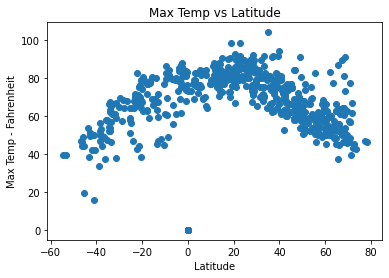

In [29]:
plt.xlabel("Latitude")
plt.ylabel("Max Temp - Fahrenheit")
plt.title("Max Temp vs Latitude")
plt.scatter(city_df_clean.Latitude, city_df_clean.Max_Temp)
plt.show()

## Latitude vs. Humidity Plot

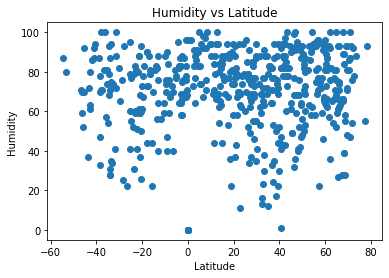

In [30]:
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude")
plt.scatter(city_df_clean.Latitude, city_df_clean.Humidity)
plt.show()

## Latitude vs. Cloudiness Plot

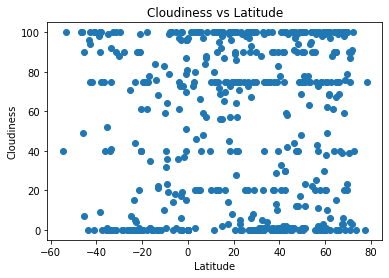

In [31]:
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude")
plt.scatter(city_df_clean.Latitude, city_df_clean.Cloudiness)
plt.show()

## Latitude vs. Wind Speed Plot

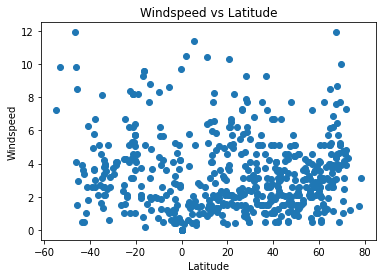

In [32]:
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Windspeed vs Latitude")
plt.scatter(city_df_clean.Latitude, city_df_clean.Windspeed)
plt.show()

## Linear Regression

In [33]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_df_clean[city_df_clean["Latitude"]>0]
northern_hemisphere.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Windspeed,Country
0,vila,42.03,-8.16,62.996,87.0,0.0,3.10,PT
2,batticaloa,7.71,81.69,81.572,76.0,87.0,1.38,LK
5,ribeira grande,38.52,-28.70,69.404,71.0,13.0,2.60,PT
8,yellowknife,62.46,-114.35,60.008,82.0,75.0,7.70,CA
11,bilibino,68.05,166.44,81.122,39.0,59.0,6.43,RU


In [34]:
southern_hemisphere = city_df_clean[city_df_clean["Latitude"]<0]
southern_hemisphere.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Windspeed,Country
1,rikitea,-23.12,-134.97,67.262,59.0,44.0,6.20,PF
3,hervey bay,-25.30,152.85,64.004,95.0,71.0,2.68,AU
6,vaini,-21.20,-175.20,75.200,88.0,20.0,4.60,TO
7,busselton,-33.65,115.33,57.002,74.0,41.0,3.99,AU
9,atuona,-9.80,-139.03,79.484,76.0,32.0,8.31,PF


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

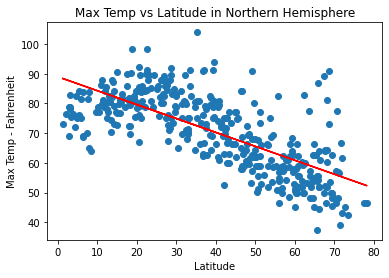

In [35]:

x_axis = northern_hemisphere["Latitude"]
y_axis = northern_hemisphere["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Max Temp - Fahrenheit")
plt.title("Max Temp vs Latitude in Northern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

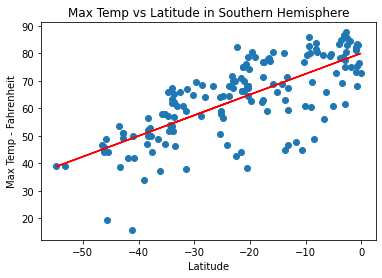

In [36]:

x_axis = southern_hemisphere["Latitude"]
y_axis = southern_hemisphere["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Max Temp - Fahrenheit")
plt.title("Max Temp vs Latitude in Southern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

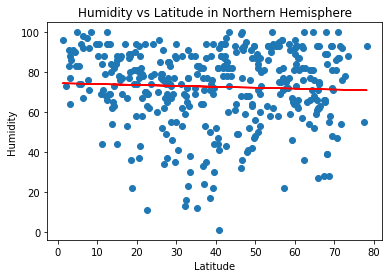

In [37]:

x_axis = northern_hemisphere["Latitude"]
y_axis = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Northern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

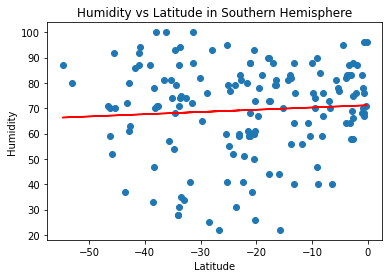

In [38]:
x_axis = southern_hemisphere["Latitude"]
y_axis = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

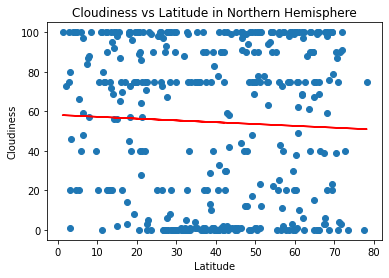

In [39]:

x_axis = northern_hemisphere["Latitude"]
y_axis = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude in Northern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

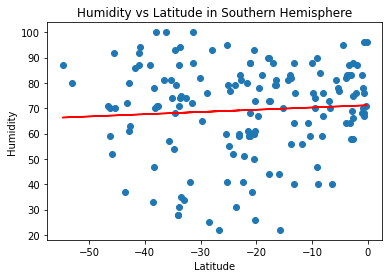

In [40]:

x_axis = southern_hemisphere["Latitude"]
y_axis = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude in Southern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

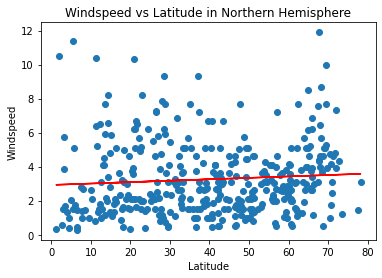

In [41]:

x_axis = northern_hemisphere["Latitude"]
y_axis = northern_hemisphere["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Windspeed vs Latitude in Northern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

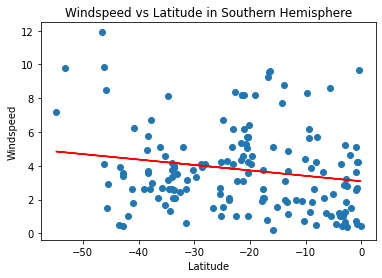

In [42]:

x_axis = southern_hemisphere["Latitude"]
y_axis = southern_hemisphere["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Windspeed vs Latitude in Southern Hemisphere")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")